<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/QRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit qiskit-ibm-runtime qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.

random number

Successfully imported Qiskit Runtime modules.
Initializing IBM QiskitRuntimeService with token...


<ipython-input-3-09ee19ff2333>:39: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT, instance=IBM_QUANTUM_INSTANCE_DIRECT, token=IBM_QUANTUM_TOKEN_DIRECT)


IBM QiskitRuntimeService initialized.

Attempting to get QPU backend: ibm_brisbane...
Selected QPU: ibm_brisbane (Status: active)

Building Single-Qubit QRNG Test Circuit (1 qubit)...
--- Single-Qubit QRNG Circuit ---
           ┌───┐┌─┐
      q_s: ┤ H ├┤M├
           └───┘└╥┘
c_s_out: 1/══════╩═
                 0 

Building Multi-Qubit QRNG Test Circuit (3 qubits)...
--- 3-Qubit QRNG Circuit ---
           ┌───┐┌─┐      
    q_m_0: ┤ H ├┤M├──────
           ├───┤└╥┘┌─┐   
    q_m_1: ┤ H ├─╫─┤M├───
           ├───┤ ║ └╥┘┌─┐
    q_m_2: ┤ H ├─╫──╫─┤M├
           └───┘ ║  ║ └╥┘
c_m_out: 3/══════╩══╩══╩═
                 0  1  2 

--- Transpiling and Running on ibm_brisbane ---
Transpiling circuits for Qiskit Runtime backend...
  Circuit 'Single_Qubit_RNG' depth original: 2, transpiled: 4
  Circuit '3_Qubit_RNG' depth original: 2, transpiled: 4
Using SamplerV2 for ibm_brisbane
Job ID: d0gzqxzehmr0008gc290 submitted.
Processing SamplerV2 results...
  Counts for circuit 'Single_Qubit_RNG': 

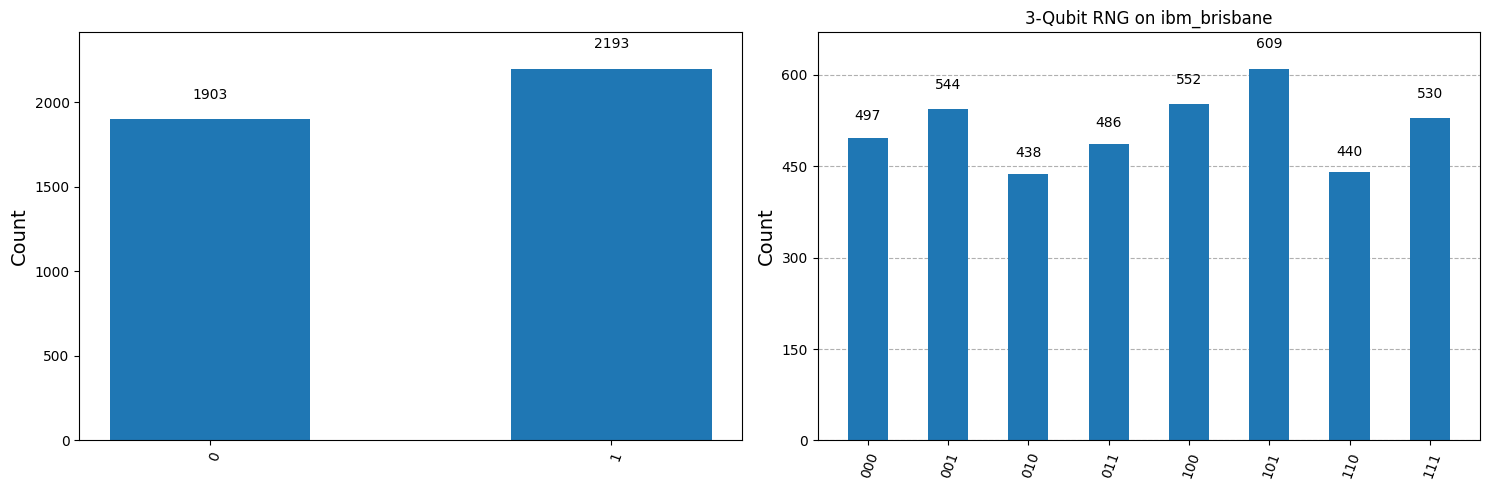


EXPERIMENT CONCLUDED. Invalidate token '99dd752798...' now.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import time
import os
import traceback

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Modern IBM Quantum access
try:
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    from qiskit_ibm_runtime.ibm_backend import IBMBackend as IBMRuntimeBackend
    qiskit_runtime_available = True
    print("Successfully imported Qiskit Runtime modules.")
except ImportError:
    print("CRITICAL WARNING: qiskit_ibm_runtime could not be imported. IBM Quantum execution will fail.")
    QiskitRuntimeService = None; Sampler = None; Session = None; generate_preset_pass_manager = None
    IBMRuntimeBackend = None
    qiskit_runtime_available = False

# --- Parameters ---
NUM_QUBITS_RNG_SINGLE = 1
NUM_QUBITS_RNG_MULTI = 3 # Number of qubits for the multi-qubit RNG

# --- IBM Quantum API Token ---
IBM_QUANTUM_TOKEN_DIRECT = 'API KEY HERE'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'
IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'

service = None
if qiskit_runtime_available:
    try:
        print(f"Initializing IBM QiskitRuntimeService with token...")
        service = QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT, instance=IBM_QUANTUM_INSTANCE_DIRECT, token=IBM_QUANTUM_TOKEN_DIRECT)
        print("IBM QiskitRuntimeService initialized.")
    except Exception as e: print(f"ERROR initializing QiskitRuntimeService: {e}"); service = None
else: print("qiskit_ibm_runtime not available.")

# --- Select Backend ---
backend = None
backend_name_to_print = "AerSimulator (local)"
backend_target_name = 'ibm_brisbane'

if service:
    try:
        print(f"\nAttempting to get QPU backend: {backend_target_name}...")
        qpu_obj = service.backend(backend_target_name)
        if qpu_obj and qpu_obj.status().operational:
            backend = qpu_obj; backend_name_to_print = backend.name
            print(f"Selected QPU: {backend.name} (Status: {backend.status().status_msg})")
        else: print(f"QPU {backend_target_name} not found/operational."); backend = None
    except Exception as e: print(f"Could not get QPU '{backend_target_name}': {e}"); backend = None

if backend is None:
    print("\nNo QPU. Falling back to AerSimulator.")
    backend = AerSimulator(); backend_name_to_print = "AerSimulator (local)"

# --- Define Test Circuits ---
circuits_rng = []
circuit_names_rng = []

# Test 1: Single-Qubit QRNG
print(f"\nBuilding Single-Qubit QRNG Test Circuit ({NUM_QUBITS_RNG_SINGLE} qubit)...")
qr_s = QuantumRegister(NUM_QUBITS_RNG_SINGLE, 'q_s')
cr_s = ClassicalRegister(NUM_QUBITS_RNG_SINGLE, 'c_s_out')
qc_rng_single = QuantumCircuit(qr_s, cr_s, name="Single_Qubit_RNG")
qc_rng_single.h(qr_s[0])
qc_rng_single.measure(qr_s[0], cr_s[0])
circuits_rng.append(qc_rng_single)
circuit_names_rng.append(qc_rng_single.name)
print("--- Single-Qubit QRNG Circuit ---")
print(qc_rng_single.draw(output='text', fold=-1))


# Test 2: Multi-Qubit QRNG (e.g., 3 qubits)
print(f"\nBuilding Multi-Qubit QRNG Test Circuit ({NUM_QUBITS_RNG_MULTI} qubits)...")
qr_m = QuantumRegister(NUM_QUBITS_RNG_MULTI, 'q_m')
cr_m = ClassicalRegister(NUM_QUBITS_RNG_MULTI, 'c_m_out')
qc_rng_multi = QuantumCircuit(qr_m, cr_m, name=f"{NUM_QUBITS_RNG_MULTI}_Qubit_RNG")
for qubit in qr_m:
    qc_rng_multi.h(qubit)
qc_rng_multi.measure(qr_m[:], cr_m[:]) # Measure all qubits in qr_m to cr_m
circuits_rng.append(qc_rng_multi)
circuit_names_rng.append(qc_rng_multi.name)
print(f"--- {NUM_QUBITS_RNG_MULTI}-Qubit QRNG Circuit ---")
print(qc_rng_multi.draw(output='text', fold=-1))


# --- Transpile and Run ---
print(f"\n--- Transpiling and Running on {backend_name_to_print} ---")
all_counts = []
try:
    shots = 4096
    is_runtime_target = (qiskit_runtime_available and service and backend and
                         IBMRuntimeBackend and isinstance(backend, IBMRuntimeBackend))

    transpiled_circuits_list = []
    if is_runtime_target and generate_preset_pass_manager:
        print("Transpiling circuits for Qiskit Runtime backend...")
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        transpiled_circuits_list = pm.run(circuits_rng)
        for i, tc in enumerate(transpiled_circuits_list):
            print(f"  Circuit '{circuits_rng[i].name}' depth original: {circuits_rng[i].depth()}, transpiled: {tc.depth()}")
    elif isinstance(backend, AerSimulator):
        print(f"Transpiling circuits for {backend_name_to_print}...")
        transpiled_circuits_list = transpile(circuits_rng, backend=backend, optimization_level=1)
        for i, tc in enumerate(transpiled_circuits_list):
            print(f"  Circuit '{circuits_rng[i].name}' depth original: {circuits_rng[i].depth()}, transpiled: {tc.depth()}")
    else:
        print(f"Using original circuits.")
        transpiled_circuits_list = circuits_rng # Use original if no transpilation path
        for i, qc_orig in enumerate(transpiled_circuits_list):
             print(f"  Circuit '{qc_orig.name}' depth: {qc_orig.depth()}")

    if is_runtime_target and Sampler and Session:
        print(f"Using SamplerV2 for {backend.name}")
        pubs = [(circ,) for circ in transpiled_circuits_list]
        with Session(backend=backend) as session:
            sampler = Sampler()
            job = sampler.run(pubs, shots=shots)
            print(f"Job ID: {job.job_id()} submitted.")
            result = job.result()
            print("Processing SamplerV2 results...")
            if result and len(result) == len(circuits_rng):
                for i_pub, pub_result in enumerate(result):
                    creg_name = circuits_rng[i_pub].cregs[0].name
                    current_counts = {}
                    if hasattr(pub_result.data, creg_name):
                        bit_array_obj = getattr(pub_result.data, creg_name)
                        if bit_array_obj: current_counts = bit_array_obj.get_counts()
                    elif hasattr(pub_result.data, 'meas'):
                         bit_array_obj = pub_result.data.meas
                         if bit_array_obj: current_counts = bit_array_obj.get_counts()
                    all_counts.append(current_counts)
                    print(f"  Counts for circuit '{circuits_rng[i_pub].name}': {current_counts}")
            else: print("ERROR: Job result issue from SamplerV2."); all_counts = [{} for _ in circuits_rng]
    elif isinstance(backend, AerSimulator):
        print(f"Using legacy backend.run() for {backend_name_to_print}")
        job = backend.run(transpiled_circuits_list, shots=shots)
        result = job.result()
        for i_qc in range(len(transpiled_circuits_list)):
            all_counts.append(result.get_counts(i_qc))
    else: print("ERROR: No suitable execution path."); all_counts = [{} for _ in circuits_rng]

    print("\n--- Combined Results ---")
    if len(all_counts) == 2:
        print("Counts for Single-Qubit RNG Test:", all_counts[0])
        print(f"Counts for {NUM_QUBITS_RNG_MULTI}-Qubit RNG Test:", all_counts[1])

        fig, axs = plt.subplots(1, 2, figsize=(15, 5))
        if all_counts[0]:
            plot_histogram(all_counts[0], ax=axs[0], title=f"Single-Qubit RNG on {backend_name_to_print}")
        else: axs[0].set_title(f"Single-Qubit RNG (No Counts)"); axs[0].text(0.5,0.5,"No Counts", ha="center")

        if all_counts[1]:
            plot_histogram(all_counts[1], ax=axs[1], title=f"{NUM_QUBITS_RNG_MULTI}-Qubit RNG on {backend_name_to_print}")
        else: axs[1].set_title(f"{NUM_QUBITS_RNG_MULTI}-Qubit RNG (No Counts)"); axs[1].text(0.5,0.5,"No Counts", ha="center")
        plt.tight_layout(); plt.show()
    else: print("Error: Did not get results for both test circuits.")

except Exception as e: print(f"Error: {e}"); traceback.print_exc()
finally: print(f"\nEXPERIMENT CONCLUDED. Invalidate token '{IBM_QUANTUM_TOKEN_DIRECT[:10]}...' now.")

random number string

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import time
import os
import traceback

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Modern IBM Quantum access
try:
    from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
    from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
    from qiskit_ibm_runtime.ibm_backend import IBMBackend as IBMRuntimeBackend
    qiskit_runtime_available = True
    print("Successfully imported Qiskit Runtime modules.")
except ImportError:
    print("CRITICAL WARNING: qiskit_ibm_runtime could not be imported. IBM Quantum execution will fail.")
    QiskitRuntimeService = None; Sampler = None; Session = None; generate_preset_pass_manager = None
    IBMRuntimeBackend = None
    qiskit_runtime_available = False

# --- IBM Quantum API Token ---
IBM_QUANTUM_TOKEN_DIRECT = 'API KEY HERE'
IBM_QUANTUM_CHANNEL_DIRECT = 'ibm_quantum'
IBM_QUANTUM_INSTANCE_DIRECT = 'ibm-q/open/main'

service = None
if qiskit_runtime_available:
    try:
        print(f"Initializing IBM QiskitRuntimeService with token...")
        service = QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT, instance=IBM_QUANTUM_INSTANCE_DIRECT, token=IBM_QUANTUM_TOKEN_DIRECT)
        print("IBM QiskitRuntimeService initialized.")
    except Exception as e: print(f"ERROR initializing QiskitRuntimeService: {e}"); service = None
else: print("qiskit_ibm_runtime not available.")

# --- Select Backend ---
backend = None
backend_name_to_print = "AerSimulator (local)"
backend_target_name = 'ibm_brisbane'

if service:
    try:
        print(f"\nAttempting to get QPU backend: {backend_target_name}...")
        qpu_obj = service.backend(backend_target_name)
        if qpu_obj and qpu_obj.status().operational:
            backend = qpu_obj; backend_name_to_print = backend.name
            print(f"Selected QPU: {backend.name} (Status: {backend.status().status_msg}, Max Qubits: {backend.num_qubits})")
        else: print(f"QPU {backend_target_name} not found/operational."); backend = None
    except Exception as e: print(f"Could not get QPU '{backend_target_name}': {e}"); backend = None

if backend is None:
    print("\nNo QPU. Falling back to AerSimulator.")
    backend = AerSimulator(); backend_name_to_print = "AerSimulator (local)"


# --- Circuit to Generate 64 Random Bits ---
NUM_RANDOM_BITS = 64
print(f"\nBuilding circuit for {NUM_RANDOM_BITS} random bits...")

qr_rng64 = QuantumRegister(NUM_RANDOM_BITS, 'qrng')
cr_rng64 = ClassicalRegister(NUM_RANDOM_BITS, 'crng_out')
qc_rng64 = QuantumCircuit(qr_rng64, cr_rng64, name="QRNG_64bit")

for qubit in qr_rng64:
    qc_rng64.h(qubit)
qc_rng64.measure(qr_rng64, cr_rng64) # Measure all to the classical register

print("\n--- Generated 64-bit QRNG Circuit ---")
# print(qc_rng64.draw(output='text')) # Will be too long to print

# --- Transpile and Run ---
print(f"\n--- Transpiling and Running QRNG_64bit on {backend_name_to_print} ---")
counts_rng64 = {}
try:
    shots_rng64 = 1 # Only need one shot for one random number

    # Check if backend can support this many qubits
    if hasattr(backend, 'num_qubits') and backend.num_qubits < NUM_RANDOM_BITS:
        print(f"ERROR: Backend {backend_name_to_print} has only {backend.num_qubits} qubits, but {NUM_RANDOM_BITS} are required.")
        raise ValueError("Not enough qubits on selected backend for 64-bit QRNG.")

    isa_circuit_rng64 = qc_rng64
    is_runtime_target = (qiskit_runtime_available and service and backend and
                         IBMRuntimeBackend and isinstance(backend, IBMRuntimeBackend))

    if is_runtime_target and generate_preset_pass_manager:
        print("Transpiling QRNG_64bit for Qiskit Runtime backend...")
        pm = generate_preset_pass_manager(backend=backend, optimization_level=0) # Level 0 for shallowest
        isa_circuit_rng64 = pm.run(qc_rng64)
        print(f"Circuit depth original: {qc_rng64.depth()}, transpiled: {isa_circuit_rng64.depth()}")
    elif isinstance(backend, AerSimulator):
        print(f"Transpiling QRNG_64bit for {backend_name_to_print}...")
        isa_circuit_rng64 = transpile(qc_rng64, backend=backend, optimization_level=0)
        print(f"Circuit depth original: {qc_rng64.depth()}, transpiled: {isa_circuit_rng64.depth()}")
    else:
        print(f"Using original circuit (depth: {qc_rng64.depth()}).")

    if is_runtime_target and Sampler and Session:
        print(f"Using SamplerV2 for {backend.name}")
        with Session(backend=backend) as session:
            sampler = Sampler()
            job = sampler.run([(isa_circuit_rng64,)], shots=shots_rng64)
            print(f"Job ID: {job.job_id()} submitted.")
            result = job.result()
            print("Processing SamplerV2 results...")
            if result and len(result) > 0:
                pub_result = result[0]
                creg_name = cr_rng64.name
                if hasattr(pub_result.data, creg_name):
                    bit_array_obj = getattr(pub_result.data, creg_name)
                    if bit_array_obj: counts_rng64 = bit_array_obj.get_counts()
                elif hasattr(pub_result.data, 'meas'):
                     bit_array_obj = pub_result.data.meas
                     if bit_array_obj: counts_rng64 = bit_array_obj.get_counts()
            else: print("ERROR: Job result issue from SamplerV2.")
    elif isinstance(backend, AerSimulator):
        print(f"Using legacy backend.run() for {backend_name_to_print}")
        job = backend.run(isa_circuit_rng64, shots=shots_rng64)
        counts_rng64 = job.result().get_counts(0)
    else: print("ERROR: No suitable execution path.")

    print("\n--- Results for 64-bit QRNG ---")
    if counts_rng64:
        # Since shots=1, there should be only one key in counts
        random_bit_string = list(counts_rng64.keys())[0]
        print(f"Generated {len(random_bit_string)}-bit random string: {random_bit_string}")
        # Verify length (Qiskit bitstrings are MSB on left)
        if len(random_bit_string) != NUM_RANDOM_BITS:
            print(f"WARNING: Expected {NUM_RANDOM_BITS} bits, got {len(random_bit_string)}")
    else:
        print("No counts received for QRNG.")

except Exception as e: print(f"Error during QRNG run: {e}"); traceback.print_exc()
finally: print(f"\nEXPERIMENT CONCLUDED. Invalidate token '{IBM_QUANTUM_TOKEN_DIRECT[:10]}...' now.")

Successfully imported Qiskit Runtime modules.
Initializing IBM QiskitRuntimeService with token...


<ipython-input-2-79f8b44d65ca>:35: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel=IBM_QUANTUM_CHANNEL_DIRECT, instance=IBM_QUANTUM_INSTANCE_DIRECT, token=IBM_QUANTUM_TOKEN_DIRECT)


IBM QiskitRuntimeService initialized.

Attempting to get QPU backend: ibm_brisbane...
Selected QPU: ibm_brisbane (Status: active, Max Qubits: 127)

Building circuit for 64 random bits...

--- Generated 64-bit QRNG Circuit ---

--- Transpiling and Running QRNG_64bit on ibm_brisbane ---
Transpiling QRNG_64bit for Qiskit Runtime backend...
Circuit depth original: 2, transpiled: 4
Using SamplerV2 for ibm_brisbane
Job ID: d0gzqjpvpqf00084e1h0 submitted.
Processing SamplerV2 results...

--- Results for 64-bit QRNG ---
Generated 64-bit random string: 1001011010000110001101101010011000010000111100011111111010000111

EXPERIMENT CONCLUDED. Invalidate token '99dd752798...' now.
